# Homework 1: Box Office Revenue Prediction
## Maximilian Matyash 318828761 Avi Simkin 312485816

## Git Repo: https://github.com/avi13s/Data-Analysis-Presentation-lab---HW1

# Part 1: EDA

## 1.A Features Explanation

Available features are: 
 * 'backdrop_path'  -  A path to some image that isn't provided to us and thus irrelevant
 * 'belongs_to_collection' - The movie collection the movie belongs to and its id and some paths to images
 * 'budget' - The budget of the movie in usd
 * 'genres' - The genres of the movie in order of relevance
 * 'homepage' - a url leading to the website of the movie, if one exists
 * 'id' - unique identifier for the movie
 * 'imdb_id' - movie's unique identifier in the imdb database
 * 'original_language' - the language in which the movie was shot
 * 'original_title' - the movie's title in its original language
 * 'overview' - a short summary of the plot
 * 'popularity' - some kind of numeric scale of the movie's popularity
 * 'poster_path' - path to an image of the movie's poster, if one exists
 * 'production_companies' - Main companies that invested in the film
 * 'production_countries' - country(ies) in which the movie was shot
 * 'release_date' - original theatrical release date of the movie
 * 'revenue' - box office revenue in usd
 * 'runtime' - the movie's duration, in minutes
 * 'spoken_languages' - languages spoken in the movie
 * 'status' - release status of the movie, however all entries are tagged as "released"
 * 'tagline' - the movie's "slogan"
 * 'title' - the movie's title, in english
 * 'video' - binary feature, probably signifying the movie was exclusive to home video. only 18/5125 are True
 * 'vote_average' - average movie score from 0 to 10, likely as rated on imdb or some other review site
 * 'vote_count' - number of voters resulting in the mentioned average
 * 'Keywords' - list of words that are strongly associated with the movie's plot/themes
 * 'cast' - list of cast members
 * 'crew' - list of crew members

## 1.C Missing Data

We are going slightly out of order as it makes more sense to deal with missing entries in the data before going over feature distributions and correlations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [ ]:
df = pd.read_csv("train.tsv", sep="\t")
df.isna().sum() / len(df)

backdrop_path            0.110642
belongs_to_collection    0.795781
budget                   0.000000
genres                   0.000000
homepage                 0.661361
id                       0.000000
imdb_id                  0.002876
original_language        0.000000
original_title           0.000000
overview                 0.001151
popularity               0.000000
poster_path              0.032023
production_companies     0.000000
production_countries     0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000767
spoken_languages         0.000000
status                   0.000000
tagline                  0.196548
title                    0.000000
video                    0.000000
vote_average             0.000000
vote_count               0.000000
Keywords                 0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

We can see above the percentages of missing values for each feature in the train data. We can see that for a large amount of movies the "homepage" and "collection" (and also "backdrop" and "tagline" to a lesser extent) features are missing. This seems normal though, since most movies are stand-alone and won't belong to a collection nor will most movies (especially lower budget ones) have a dedicated website with a homepage. The same can be said for most features with missing values that we see, moreover the missing values appear for the most part in features that are not relevat to us for prediction ("poseter path" for example). However, there is one feature with missing values that is important to us and it is the "runtime" of the movie. In our opinion this feature can be indicative of a movie's revenue and having a movie with an unknown runtime for that matter won't make sense. Since it's a miniscule amount of movies (~0.7%), we won't bother imputing these values and simply remove them.

In [ ]:
# Checking that there aren't any empty dictionaries we should count as missing data

for col in df.columns:
  if type(list(df[col])[0]) == dict:
    for x in df[col]:
      if len(x) == 0:
        print('empty dict detected')

## 1.B Analysis

### Continuous Variables

We start by looking at a scatter matrix for all numeric features

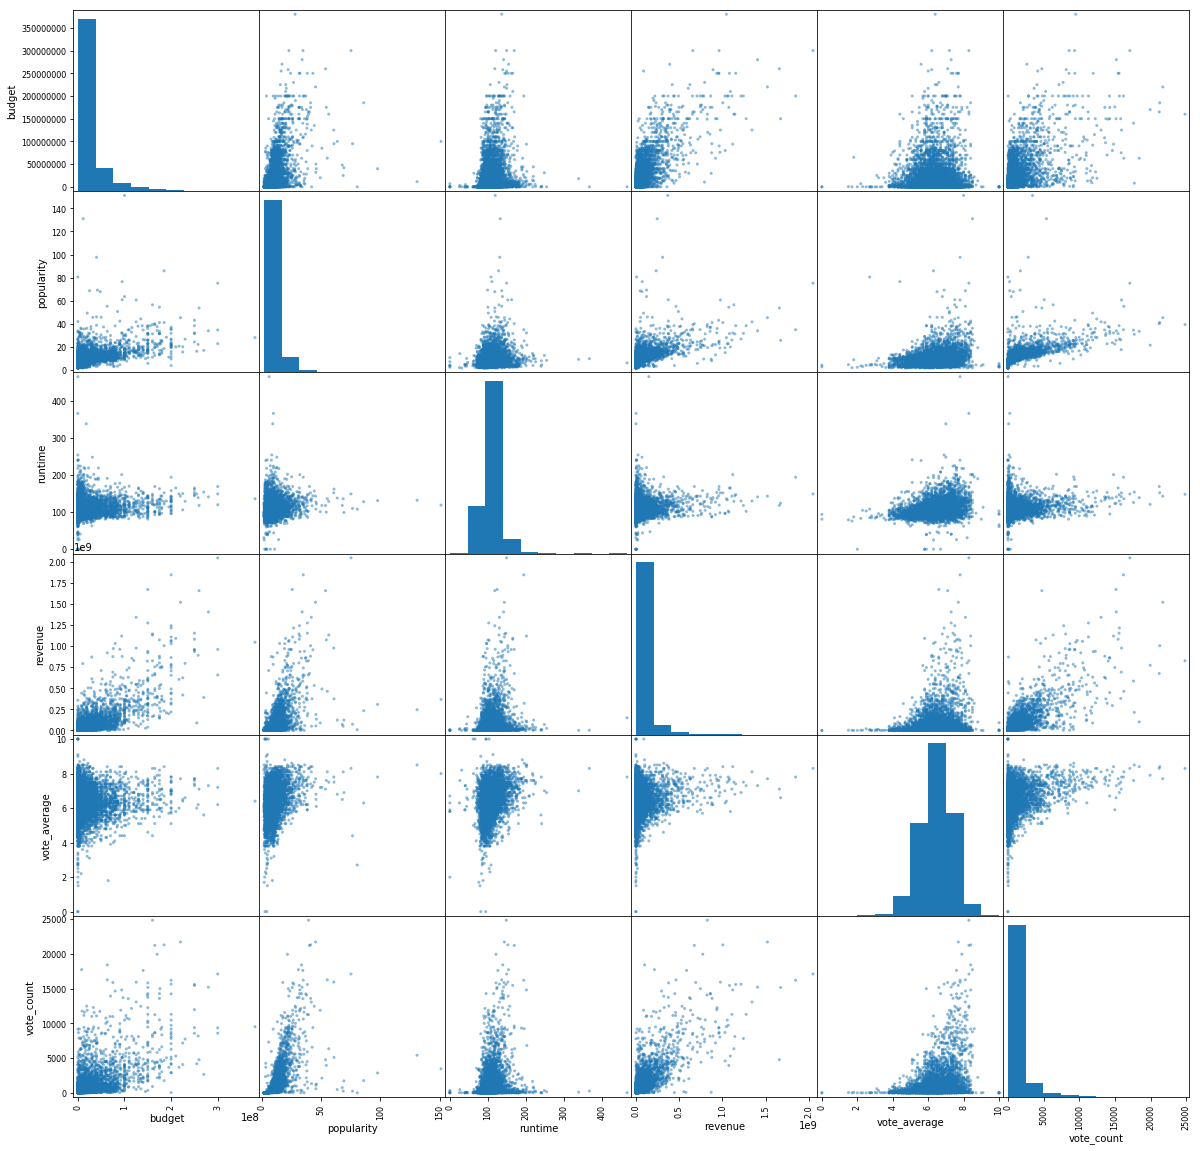

In [ ]:
numeric_vars = df[['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']]
pd.plotting.scatter_matrix(numeric_vars, figsize=(20, 20))
plt.show()

The above graphs are pretty informative, we can see for example that while there's some correlation between average votes and revenue, the vote count is actually more correlated! Also, some graphs are pretty expected and trivial - like popularity&vote count. Seems that the budget and vote_count have the largest correlation to revenue

Also, we can see the distributions of each feature along the diagonal.



We also generate box-plots for each feature: (two features in the same plot just to be more compact)

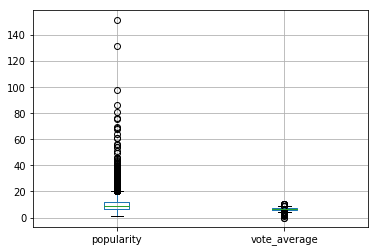

In [ ]:
normalized = numeric_vars.div(numeric_vars.sum(axis=1), axis=0)
numeric_vars.boxplot(column=['popularity', 'vote_average'])

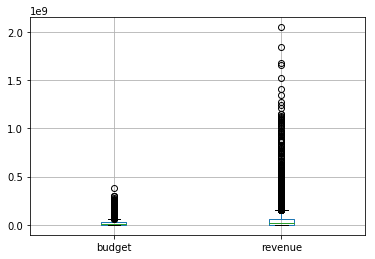

In [ ]:
numeric_vars.boxplot(column=['budget', 'revenue'])

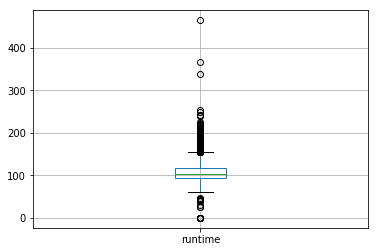

In [ ]:
numeric_vars.boxplot(column=['runtime'])

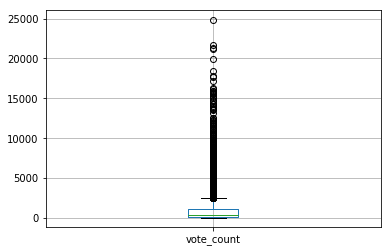

In [ ]:
numeric_vars.boxplot(column=['vote_count'])

We can see that some features seemingly have a lot of outliers as they don't follow a normal distribution, but something closer to a power law (but not exactly)

### Categorical Variables

For the categorical variables we are mainly intrested in the difference in distribution of revenue among the categories. We managed to turn some features into categorical variables, namely:'genre', 'company', 'country', 'spoken_language', 'language'.
If the feature contained a list of values (such as multiple production countries) we took only the first value under the assumption that it is the most dominant (e.g. the country in which the majority of the movie was filmed). Additionally, due to the distribution of the revenue, it would be easier to look at a plot of the log-revenue distribution among all categories. In the following plots we see the log-revenue on the y-axis and the categories on the x-axis

In [ ]:
def get_first_value(s):
    if s.strip("{[]}"):
        return int(s.strip("{[]}").split(", ")[0].split(": ")[1])
    return -1

def get_first(s):
    if s.strip("{[]}"):
        return s.strip("{[]}").split(", ")[0].split(": ")[1]
    return -1

df['log_rev'] = df['revenue'].apply(np.log)
df['genre'] = df['genres'].apply(get_first_value)
df['genre'] = df.genre.astype('category').cat.codes
df['language'] = df.original_language.astype('category').cat.codes
df['company'] = df['production_companies'].apply(get_first_value)
df['company'] = df.genre.astype('category').cat.codes
df['country'] = df['production_countries'].apply(get_first)
df['country'] = df.genre.astype('category').cat.codes
df['spoken_language'] = df['spoken_languages'].apply(get_first)
df['spoken_language'] = df.genre.astype('category').cat.codes

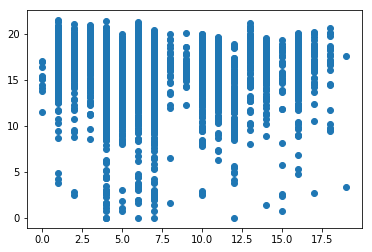

In [ ]:
plt.scatter(df['genre'].to_numpy(), df['log_rev'].to_numpy())

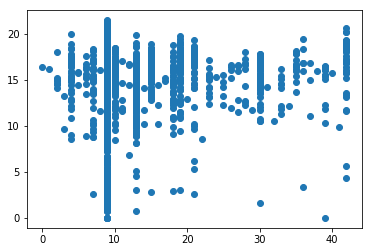

In [ ]:
plt.scatter(df['language'].to_numpy(), df['log_rev'].to_numpy())

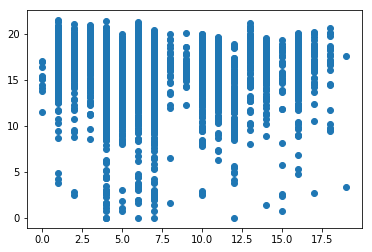

In [ ]:
plt.scatter(df['company'].to_numpy(), df['log_rev'].to_numpy())

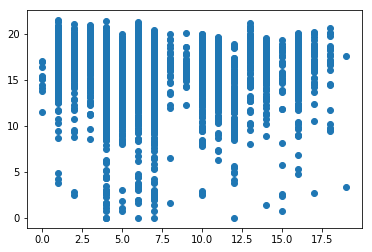

In [ ]:
plt.scatter(df['country'].to_numpy(), df['log_rev'].to_numpy())

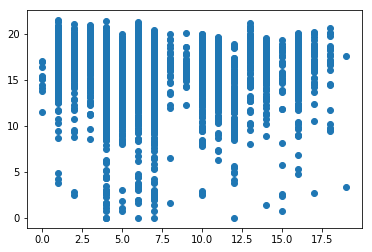

In [ ]:
plt.scatter(df['spoken_language'].to_numpy(), df['log_rev'].to_numpy())

We can see that there is a difference in distribution of revenue among the various categories of each feature (though it is more prominent in some)

# Part 2: Feature Engineering

## 2.A Used Features

We will be using all features mentioned in part 1, specifically, 'budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'genre', 'company', 'country', 'spoken_language', 'language'; as we have seen that each of them has at the very least a weak correlation with the revenue and a few of them have a string correlation with the revenue

## 2.B Feature Transformation

Other than the extraction of categorical variables from the original features as mentioned in part 1, we did not perform any other transformations as we have seen that our chosen model (XGB) performs better without it in contrast to the other models that we have used.

## 2.C Handling Missing Data

As seen in part 1, the majority of missing data occurs in features that are irrelevant to us. The only feature containing missing data we use has an insignificant amount of data missing therefore it is unlikely that we will see any difference in the performance of our model weather we impute those missing values or remove them outright. We chose to remove the entries having missing "runtime" values, which was 27 out of the total 5215 values.

In [ ]:
def prepare(dataframe, features, response):
    df = dataframe.copy()
    df["backdrop_path"].fillna("", inplace=True)
    df["belongs_to_collection"].fillna("", inplace=True)
    df["homepage"].fillna("", inplace=True)
    df["poster_path"].fillna("", inplace=True)
    df["tagline"].fillna("", inplace=True)
    df.dropna(inplace=True)
    df['genre'] = df['genres'].apply(get_first_value)
    df['genre'] = df.genre.astype('category').cat.codes
    df['company'] = df['production_companies'].apply(get_first_value)
    df['company'] = df.genre.astype('category').cat.codes
    df['country'] = df['production_countries'].apply(get_first)
    df['country'] = df.genre.astype('category').cat.codes
    df['spoken_language'] = df['spoken_languages'].apply(get_first)
    df['spoken_language'] = df.genre.astype('category').cat.codes
    df['language'] = df.original_language.astype('category').cat.codes
    return df[features].to_numpy(), df[response].to_numpy()

features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 
            'genre', 'company', 'country', 'spoken_language', 'language']
response = 'revenue'
df_train = pd.read_csv("train.tsv", sep="\t")
df_test = pd.read_csv("test.tsv", sep="\t")
X_train, y_train = prepare(df_train, features, response)
X_test, y_test = prepare(df_test, features, response)

# Prediction

Here we'll try on 3 different models:
* Logistic regression - as a naive baseline
* SVR (like SVM but for regression) - as a more complicated and "smart" model
* XGBoost as a strong and popular solution

Also, we performed some hyperparameter tuning (but not really as you will see later) for the XGB model as it was the only one that had descent performance to begin with

In [ ]:
# Base line model - logistic regression

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.preprocessing import Normalizer

# First, for this model we'll have to impute NaNs and normalize
transformer = Normalizer()
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_test[np.isnan(X_test)] = np.median(X_test[~np.isnan(X_test)])
X_train_normed = transformer.transform(X_train)
X_test_normed = transformer.transform(X_test)

lr_default = LogisticRegression()
lr_regularized = LogisticRegression(C=0.85)

lr_default.fit(X_train_normed, y_train)
y_hat = lr_default.predict(X_test_normed)
rmsle = msle(y_test, y_hat) ** 0.5
print(f'Default logistic RMSLE = {rmsle}')

lr_regularized.fit(X_train_normed, y_train)
y_hat = lr_regularized.predict(X_test_normed)
rmsle = msle(y_test, y_hat) ** 0.5
print(f'regularized logistic RMSLE = {rmsle}')

Default logistic RMSLE = 5.294320172648624
regularized logistic RMSLE = 5.045697990170599


These results are far from the standard we're looking for and thus we'll not be investing our time on tweaking the hyper-parameters

In [ ]:
# Now, trying also trying an SVM solution

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X_train, y_train = prepare(train_df, features, response)
X_test, y_test = prepare(test_df, features, response)
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_test[np.isnan(X_test)] = np.median(X_test[~np.isnan(X_test)])

clf = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.2))
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)
rmsle = msle(y_test, y_hat) ** 0.5
print(f'Default SVR RMSLE = {rmsle}')

Default SVR RMSLE = 2.9811313347783535


Still a bit too far from the expected RMSLE (Below 2.5) and run times aren't the best, so we'll go over to the next possible algorithm which is XGBoost - a very popular model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error as msle

X_train, y_train = prepare(train_df, features, response)
X_test, y_test = prepare(test_df, features, response)
base_model = xgb.XGBRegressor(objective="reg:gamma")
base_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
y_hat = base_model.predict(X_test)
rmsle = msle(y_test, y_hat) ** 0.5
rmsle

2.141043131353344

That's more like it! and it's also the lowest we have achieved

In [ ]:
# Here we'll try a grid search with Cross Validation for best hyper parameter finding

from sklearn.model_selection import GridSearchCV
import time

gs = GridSearchCV(xgb.XGBRegressor(), 
                  param_grid={'objective' : ["reg:gamma"],
                              'max_depth': range(6, 10),
                              'learning_rate': [0.02, 0.2, 0.3, 0.4],
                              'reg_alpha': range(0, 5),
                              'reg_lambda': [0, 0.1, 0.3, 0.5, 0.7, 1],
                             },
                  cv=10, 
                  return_train_score=True)
start = time.time()
gs.fit(X_train, y_train)
print(f"train time: {time.time() - start}")
best_gscv = gs.best_estimator_

train time: 1904.1542265415192


Eventually, we chose XGBoost regression with the Gamma objective function. This ensures that the predictions are always non-negative which makes sense in our context since the revenue is non-negative. We can say that empirically it gave us very good results.